In [198]:
import pandas as pd

#load data
data = pd.read_csv('/home/raj/Desktop/Github_Project/House_Price_Predictor/data/bengaluru_house_prices.csv') 
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [199]:
data = data.drop(['area_type', 'availability','society'], axis=1) #delete collumns

In [200]:
data.isnull().sum() #check null values

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [201]:
data = data.dropna(subset=['location','size'])#delete null values from specific columns

In [202]:
data = data.reset_index(drop=True)# reset index number

In [203]:
data =data.rename(columns={'size' : 'bhk'}) # renamed column size

In [204]:
data.head()#check column

,location,bhk,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [205]:
data.head()# check column

,location,bhk,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [206]:
data['bhk'] = data['bhk'].str.split(' ').str[0].astype('int')

In [207]:
data.head()#check removal

,location,bhk,total_sqft,bath,balcony,price
0,Electronic City Phase II,2,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4,2600,5.0,3.0,120.00
2,Uttarahalli,3,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3,1521,3.0,1.0,95.00
4,Kothanur,2,1200,2.0,1.0,51.00


In [208]:
data.info()#chek data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13303 entries, 0 to 13302
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13303 non-null  object 
 1   bhk         13303 non-null  int64  
 2   total_sqft  13303 non-null  object 
 3   bath        13246 non-null  float64
 4   balcony     12710 non-null  float64
 5   price       13303 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 623.7+ KB


In [209]:
data.head()#check data

,location,bhk,total_sqft,bath,balcony,price
0,Electronic City Phase II,2,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4,2600,5.0,3.0,120.00
2,Uttarahalli,3,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3,1521,3.0,1.0,95.00
4,Kothanur,2,1200,2.0,1.0,51.00


In [210]:
data['location'] = data['location'].str.strip()#remove spaces from start and end in location column

In [211]:
loc_group = data.groupby('location')['location'].agg('count').sort_values(ascending=False)#group the value and arrange in descending order

In [212]:
rare_location = loc_group[loc_group <= 10]#save the rare location

In [213]:
data['location'] = data['location'].apply(lambda x: 'other' if x in rare_location else x) #replace rare locations to other

In [214]:
len(data['location'].unique())

242

In [215]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13303 entries, 0 to 13302
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13303 non-null  object 
 1   bhk         13303 non-null  int64  
 2   total_sqft  13303 non-null  object 
 3   bath        13246 non-null  float64
 4   balcony     12710 non-null  float64
 5   price       13303 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 623.7+ KB


In [216]:
data.head()

,location,bhk,total_sqft,bath,balcony,price
0,Electronic City Phase II,2,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4,2600,5.0,3.0,120.00
2,Uttarahalli,3,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3,1521,3.0,1.0,95.00
4,Kothanur,2,1200,2.0,1.0,51.00


In [217]:
def nois_clean(x):
    try:
        float(x)
        return True
    except:
        if '-' in x :
            return True
        else:
            return False

In [218]:
data = data[data['total_sqft'].apply(nois_clean)]


In [219]:
data =data.reset_index(drop=True)

In [220]:
def range_to_avg(x):
    try:
        if '-' in x :
            x = x.split('-')
            peace_1 = float(x[0])
            peace_2 = float(x[-1])
            avg = (peace_1 + peace_2)/2
            return avg
        else:
            float(x)
            return x
    except:
        print("check the input")
            

In [221]:
data['total_sqft'] = data['total_sqft'].apply(range_to_avg)

In [222]:
data['total_sqft'] = data['total_sqft'].astype(float)

In [223]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13257 entries, 0 to 13256
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13257 non-null  object 
 1   bhk         13257 non-null  int64  
 2   total_sqft  13257 non-null  float64
 3   bath        13200 non-null  float64
 4   balcony     12668 non-null  float64
 5   price       13257 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 621.6+ KB


In [224]:
data = data[ (data['total_sqft'] / data['bhk']) >=300 ]

In [225]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12513 entries, 0 to 13256
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    12513 non-null  object 
 1   bhk         12513 non-null  int64  
 2   total_sqft  12513 non-null  float64
 3   bath        12456 non-null  float64
 4   balcony     12013 non-null  float64
 5   price       12513 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 684.3+ KB


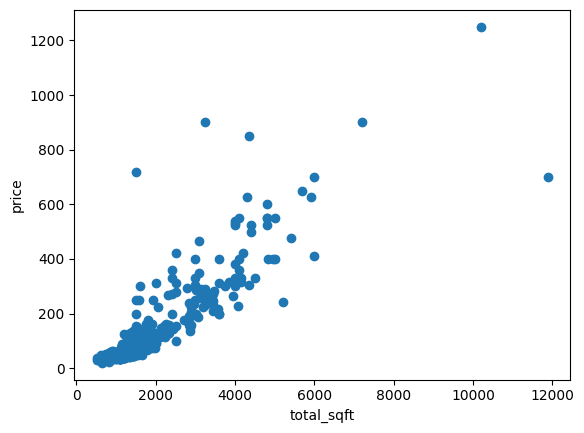

In [226]:
import matplotlib.pyplot as plt

check_data = data[data.location == "Whitefield"]

plt.scatter(check_data.total_sqft,check_data.price)

plt.xlabel('total_sqft')
plt.ylabel('price')

plt.show()

In [227]:
data['bath'].isnull().sum()

np.int64(57)

In [228]:
data = data.dropna(subset='bath')

In [229]:
data = data.reset_index(drop=True)

In [230]:
data['bath'].isnull().sum()

np.int64(0)

In [231]:
data = data[data['bath'] < data['bhk'] + 2]

In [232]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12303 entries, 0 to 12455
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    12303 non-null  object 
 1   bhk         12303 non-null  int64  
 2   total_sqft  12303 non-null  float64
 3   bath        12303 non-null  float64
 4   balcony     11884 non-null  float64
 5   price       12303 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 672.8+ KB


In [233]:
data = data.drop(['balcony'],axis=1)

In [234]:
data['price_per_squre'] = data['price']*100000 / data['total_sqft']

In [235]:
data.head()

,location,bhk,total_sqft,bath,price,price_per_squre
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000


In [236]:
means = data.groupby('location')['price_per_squre'].transform('mean')

In [237]:
stds = data.groupby('location')['price_per_squre'].transform('std')

In [238]:
data = data[(data.price_per_squre > means - stds) & (data.price_per_squre <= means + stds)]

In [239]:
data= data.drop(['price_per_squre'],axis=1)

In [240]:
data= data.reset_index(drop=True)

In [241]:
data.head()

,location,bhk,total_sqft,bath,price
0,Electronic City Phase II,2,1056.0,2.0,39.07
1,Chikka Tirupathi,4,2600.0,5.0,120.00
2,Uttarahalli,3,1440.0,2.0,62.00
3,Lingadheeranahalli,3,1521.0,3.0,95.00
4,Kothanur,2,1200.0,2.0,51.00


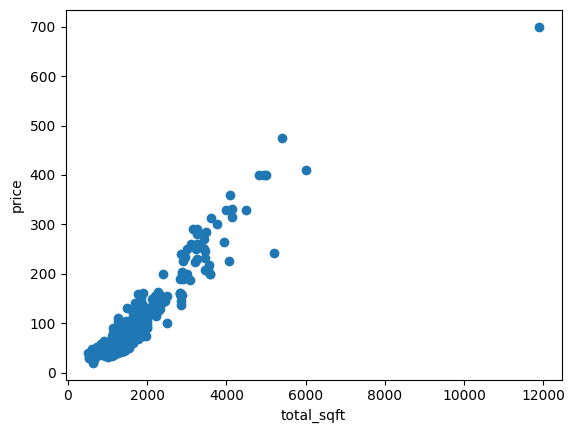

In [242]:
import matplotlib.pyplot as plt

check_data = data[data.location == "Whitefield"]

plt.scatter(check_data.total_sqft,check_data.price)

plt.xlabel('total_sqft')
plt.ylabel('price')

plt.show()

In [250]:
data.head()

,bhk,total_sqft,bath,price,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2,1056.0,2.0,39.07,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,4,2600.0,5.0,120.00,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,1440.0,2.0,62.00,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3,1521.0,3.0,95.00,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2,1200.0,2.0,51.00,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [244]:
dumies = pd.get_dummies(data.location)

In [246]:
dumies = dumies.drop('other', axis=1)

In [247]:
data = pd.concat([data,dumies], axis=1)

In [249]:
data = data.drop('location', axis=1)

In [254]:
data = data.reset_index(drop=True)

In [255]:
data.head()

,bhk,total_sqft,bath,price,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2,1056.0,2.0,39.07,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,4,2600.0,5.0,120.00,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,1440.0,2.0,62.00,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3,1521.0,3.0,95.00,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2,1200.0,2.0,51.00,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [253]:
data.to_csv('/home/raj/Desktop/Github_Project/House_Price_Predictor/data/cleanned_bengaluru_house_prices.csv',index=False)